## Подключение модулей и получение входных данных


In [ ]:
import mne
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np

#path to data folder
BASEPATH = "/data/"

def search_datafile(path, paths_list):
  for filename in os.listdir(path):
    new_path = path + "/" + filename
    if (os.path.isfile(new_path) and filename[0:11] == "neurovisor_"):
        folder_offset = len(BASEPATH);
        paths_list.append([new_path[folder_offset + 1:folder_offset + 7], new_path])
    elif (os.path.isdir(new_path)):
        search_datafile(new_path, paths_list)

paths_list = []
search_datafile(BASEPATH, paths_list)

print(paths_list)

[['113244', 'drive/MyDrive/data/113244/001/neurovisor_2025-04-14_13-40-50.edf'], ['093056', 'drive/MyDrive/data/093056/001/neurovisor_2025-04-02_14-45-14.edf'], ['146831', 'drive/MyDrive/data/146831/001/neurovisor_2025-04-23_16-30-31.edf'], ['054051', 'drive/MyDrive/data/054051/001/neurovisor_2025-04-03_10-47-46.edf'], ['054051', 'drive/MyDrive/data/054051/002/neurovisor_2025-04-03_11-43-00.edf'], ['120125', 'drive/MyDrive/data/120125/001/neurovisor_2025-04-19_13-56-16.edf'], ['045286', 'drive/MyDrive/data/045286_err/neurovisor_2025-04-04_15-24-30.edf'], ['155121', 'drive/MyDrive/data/155121/001/neurovisor_2025-04-19_16-49-10.edf'], ['135304', 'drive/MyDrive/data/135304/001/neurovisor_2025-04-24_16-59-30.edf'], ['105832', 'drive/MyDrive/data/105832/neurovisor_2025-03-22_16-05-32.edf'], ['076658', 'drive/MyDrive/data/076658/001/neurovisor_2025-04-28_16-38-32.edf'], ['344772', 'drive/MyDrive/data/344772/001/neurovisor_2025-04-21_16-14-32.edf'], ['208114', 'drive/MyDrive/data/208114/001/n

## Извлекём метки классов
**0 - мужчина, 1 - женщина**

In [8]:
marks = []
with open("mark.txt", "r") as file:
  lines = file.readlines()
  for line in lines:
    user, s = line.split(' ')
    sn = 1
    if (s == "m\n"):
      sn = 0
    marks.append([user, sn])

evaluation = []
for mark_s, sn in marks:
  for mark_d, path in paths_list:
    if (mark_s == mark_d):
      evaluation.append([sn, path])
print(marks)
print(evaluation)

[['076658', 0], ['333752', 0], ['325017', 0], ['365415', 0], ['902176', 0], ['885292', 0], ['195499', 0], ['146831', 0], ['845926', 1], ['913071', 0], ['735684', 0], ['834979', 0], ['443408', 0], ['648208', 1], ['841045', 0], ['373596', 0], ['113244', 0], ['045286', 1], ['862274', 0], ['761404', 0], ['557394', 0], ['632847', 0], ['054051', 0], ['710022', 0], ['120125', 1], ['814770', 0], ['483009', 0], ['155121', 0], ['679594', 0], ['135304', 1], ['447885', 0], ['355835', 1], ['587707', 0], ['105832', 0], ['265094', 1], ['093056', 0], ['527415', 1], ['825526', 0], ['907623', 0], ['971006', 0], ['489107', 0], ['863463', 0], ['241446', 0], ['820694', 0], ['475645', 0], ['319924', 0], ['208114', 0], ['300279', 0], ['446415', 0], ['666522', 0], ['344772', 0]]
[[0, 'drive/MyDrive/data/076658/001/neurovisor_2025-04-28_16-38-32.edf'], [0, 'drive/MyDrive/data/333752/003/neurovisor_2025-04-18_11-41-43.edf'], [0, 'drive/MyDrive/data/333752/001/neurovisor_2025-04-18_10-29-10.edf'], [0, 'drive/MyD

## Подготовка входных данных
**Удалим канал ecg и проведём фильтрацию по частотам, разобъём данные каналов на равные части, а также найдём средние и частотные признаки** (по 5 сек на каждый)

Extracting EDF parameters from /content/drive/MyDrive/data/195499/001/neurovisor_2025-04-17_16-41-56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-6-2211535387.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(evaluation[8][1], preload=True)
/tmp/ipython-input-6-2211535387.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(evaluation[8][1], preload=True)


Reading 0 ... 3884999  =      0.000 ...  3884.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished


0 bad epochs dropped


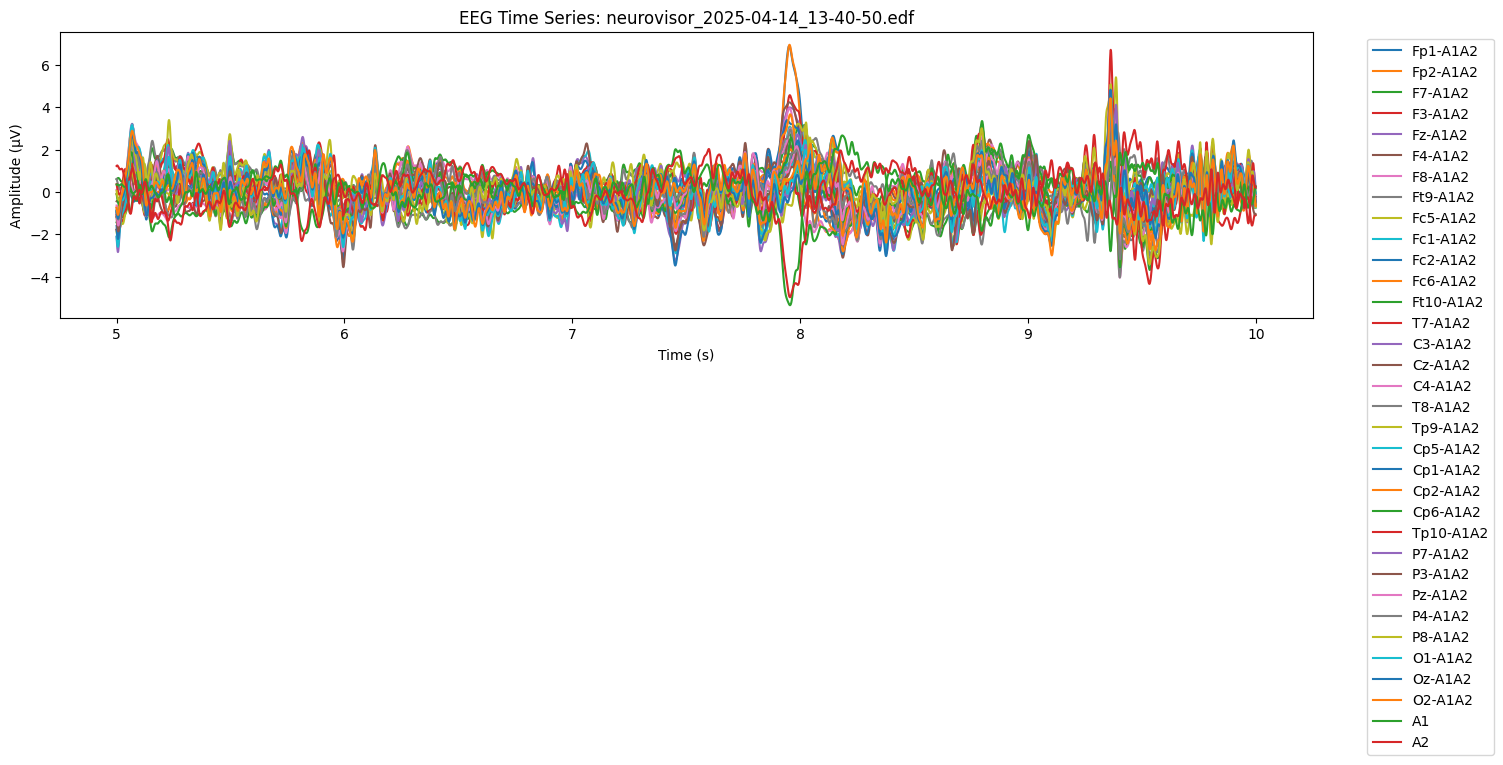

In [6]:
DURATION = 5
MAX = 600

def get_epochs(raw, duration, max):
  if (max != -1):
    raw.crop(tmin=0, tmax=max)
  raw.drop_channels(['ECG V3-V1'])

  raw.filter(l_freq=0.5, h_freq=40)
  epochs = mne.make_fixed_length_epochs(raw, duration=duration, preload=True)
  epoch_data = epochs.get_data()

  return epoch_data


raw = mne.io.read_raw_edf(evaluation[8][1], preload=True)
epoch_data = get_epochs(raw, DURATION, MAX)
# Визуализация первых 5 секунд данных (одна эпоха) для всех каналов

n_epochs, n_channels, n_samples = epoch_data.shape
data_normalized = np.zeros_like(epoch_data)
for i in range(epoch_data.shape[0]):  # По всем эпохам
    mean = np.mean(epoch_data[i], axis=1, keepdims=True)  # Среднее по времени для каждого канала
    std = np.std(epoch_data[i], axis=1, keepdims=True)    # Стандартное отклонение по времени
    data_normalized[i] = (epoch_data[i] - mean) / std


plt.figure(figsize=(15, 6))

data, times = raw[:]
freq = raw.info['sfreq']
start = int(5 * freq)
end = int(10 * freq)

plt.plot(times[start:end], data_normalized[1].T)
plt.title(f"EEG Time Series: {Path(paths_list[0][1]).name}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.legend(raw.ch_names, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

##Извлечём нужные признаки и нормализуем их

In [9]:
from scipy.stats import entropy
from scipy.signal import welch

all_data = []

count = 0
for sn, path in evaluation:
  raw = mne.io.read_raw_edf(path, preload=True)
  if (sn == 0):
    epoch_data = get_epochs(raw, DURATION, MAX)
  else:
    epoch_data = get_epochs(raw, DURATION, -1)
  # Визуализация первых 5 секунд данных (одна эпоха) для всех каналов

  n_epochs, n_channels, n_samples = epoch_data.shape
  data_normalized = np.zeros_like(epoch_data)

  for i in range(epoch_data.shape[0]):  # По всем эпохам
      mean = np.mean(epoch_data[i], axis=1, keepdims=True)  # Среднее по времени для каждого канала
      std = np.std(epoch_data[i], axis=1, keepdims=True)    # Стандартное отклонение по времени
      data_normalized[i] = (epoch_data[i] - mean) / std

      epoch_features = []
      for channel in data_normalized[i]:
        mean_val = np.mean(channel)
        std_val = np.std(channel)
        peak_to_peak = np.max(channel) - np.min(channel)
        hist, _ = np.histogram(channel, bins=10)
        ent = entropy(hist)  # Энтропия

        fs = raw.info['sfreq']  # Частота дискретизации из метаданных raw
        f, psd = welch(channel, fs=fs, nperseg=int(fs))  # nperseg = частота дискретизации для 1 секунды
        # Диапазоны частот: дельта (0.5-4 Гц), тета (4-8 Гц), альфа (8-13 Гц), бета (13-30 Гц)
        delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
        theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
        alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
        beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 30)])

        # Список признаков для канала (временные + частотные)
        channel_features = [mean_val, std_val, peak_to_peak, ent, delta_power, theta_power, alpha_power, beta_power]
        epoch_features.append(channel_features)

      all_data.append([np.array(epoch_features).flatten(), sn])

  count = count + 1
  print(f"+++++++++++++++ {count}/{len(evaluation)} файл обработан +++++++++++++++")


Extracting EDF parameters from /content/drive/MyDrive/data/076658/001/neurovisor_2025-04-28_16-38-32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3942999  =      0.000 ...  3942.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 1/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/333752/003/neurovisor_2025-04-18_11-41-43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 750999  =      0.000 ...   750.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 2/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/333752/001/neurovisor_2025-04-18_10-29-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 825999  =      0.000 ...   825.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 3/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/333752/002/neurovisor_2025-04-18_10-59-14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2427999  =      0.000 ...  2427.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 4/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/325017_err/001/neurovisor_2025-04-03_15-38-15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3941999  =      0.000 ...  3941.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 5/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/365415/001/neurovisor_2025-04-27_13-10-17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3932999  =      0.000 ...  3932.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 6/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/902176/001/neurovisor_2025-04-07_10-13-09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3884999  =      0.000 ...  3884.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 7/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/885292/001/neurovisor_2025-04-24_11-16-23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3917999  =      0.000 ...  3917.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.0s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 8/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/195499/001/neurovisor_2025-04-17_16-41-56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3884999  =      0.000 ...  3884.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 9/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/146831/001/neurovisor_2025-04-23_16-30-31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3917999  =      0.000 ...  3917.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 10/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/845926/001/neurovisor_2025-05-03_11-03-15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3955999  =      0.000 ...  3955.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.3s finished


Not setting metadata
791 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 791 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 11/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/913071/001/neurovisor_2025-04-27_16-48-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3963999  =      0.000 ...  3963.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.0s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 12/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/735684/003/neurovisor_2025-04-20_14-47-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 735999  =      0.000 ...   735.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 13/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/735684/001/neurovisor_2025-04-20_13-35-11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1277999  =      0.000 ...  1277.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 14/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/735684/002/neurovisor_2025-04-20_14-05-22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2431999  =      0.000 ...  2431.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 15/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/834979/001/neurovisor_2025-04-28_11-10-48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3952999  =      0.000 ...  3952.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 16/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/443408/001/neurovisor_2025-04-25_17-05-12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3948999  =      0.000 ...  3948.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 17/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/648208/001/neurovisor_2025-04-17_14-31-17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3868999  =      0.000 ...  3868.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.9s finished


Not setting metadata
773 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 773 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 18/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/841045/001/neurovisor_2025-04-23_14-03-28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3953999  =      0.000 ...  3953.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 19/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/373596/001/neurovisor_2025-04-28_13-44-33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4053999  =      0.000 ...  4053.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 20/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/113244/001/neurovisor_2025-04-14_13-40-50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3883999  =      0.000 ...  3883.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 21/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/045286_err/neurovisor_2025-04-04_15-24-30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3855999  =      0.000 ...  3855.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.0s finished


Not setting metadata
771 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 771 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 22/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/862274_err/001/neurovisor_2025-04-04_10-38-13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4055999  =      0.000 ...  4055.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.1s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 23/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/761404/001/neurovisor_2025-04-23_11-17-45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3884999  =      0.000 ...  3884.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 24/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/557394/001/neurovisor_2025-04-18_16-17-23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3864999  =      0.000 ...  3864.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 25/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/054051/001/neurovisor_2025-04-03_10-47-46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3170999  =      0.000 ...  3170.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 26/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/054051/002/neurovisor_2025-04-03_11-43-00.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 779999  =      0.000 ...   779.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 27/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/710022/001/neurovisor_2025-04-14_17-00-55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 951999  =      0.000 ...   951.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 28/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/710022/002/neurovisor_2025-04-14_17-21-18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2446999  =      0.000 ...  2446.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 29/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/710022/003/neurovisor_2025-04-14_18-03-09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 739999  =      0.000 ...   739.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 30/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/120125/001/neurovisor_2025-04-19_13-56-16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3931999  =      0.000 ...  3931.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.6s finished


Not setting metadata
786 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 786 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 31/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/814770/001/neurovisor_2025-04-15_13-56-24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3912999  =      0.000 ...  3912.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 32/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/483009/001/neurovisor_2025-04-16_16-39-39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3826999  =      0.000 ...  3826.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 33/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/155121/001/neurovisor_2025-04-19_16-49-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3907999  =      0.000 ...  3907.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 34/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/679594/001/neurovisor_2025-04-07_14-14-33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3855999  =      0.000 ...  3855.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 35/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/135304/001/neurovisor_2025-04-24_16-59-30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3921999  =      0.000 ...  3921.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.5s finished


Not setting metadata
784 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 784 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 36/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/447885/001/neurovisor_2025-04-25_13-47-10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3909999  =      0.000 ...  3909.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 37/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/355835/002/neurovisor_2025-04-22_17-07-13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2421999  =      0.000 ...  2421.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.1s


Not setting metadata
484 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 484 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.8s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 38/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/355835/001/neurovisor_2025-04-22_16-50-57.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 799999  =      0.000 ...   799.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 160 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 39/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/355835/003/neurovisor_2025-04-22_17-49-20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 739999  =      0.000 ...   739.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 148 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.1s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 40/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/587707/001/neurovisor_2025-04-21_13-37-40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3977999  =      0.000 ...  3977.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 41/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/105832/neurovisor_2025-03-22_16-05-32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3877999  =      0.000 ...  3877.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 42/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/265094/001/neurovisor_2025-04-05_10-51-45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3827999  =      0.000 ...  3827.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    6.3s finished


Not setting metadata
765 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 765 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 43/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/093056/001/neurovisor_2025-04-02_14-45-14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3956999  =      0.000 ...  3956.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 44/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/527415/001/neurovisor_2025-04-15_16-26-09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3855999  =      0.000 ...  3855.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.2s finished


Not setting metadata
771 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 771 events and 5000 original time points ...
0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 45/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/825526/001/neurovisor_2025-05-03_14-28-11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3982999  =      0.000 ...  3982.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 46/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/907623/001/neurovisor_2025-04-22_10-54-12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3933999  =      0.000 ...  3933.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.3s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 47/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/971006/001/neurovisor_2025-04-20_10-55-26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3962999  =      0.000 ...  3962.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 48/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/489107/001/neurovisor_2025-04-29_16-44-41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3933999  =      0.000 ...  3933.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 49/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/863463/003/neurovisor_2025-04-21_11-50-04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 745999  =      0.000 ...   745.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.2s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 50/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/863463/002/neurovisor_2025-04-21_11-06-16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2424999  =      0.000 ...  2424.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.0s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 51/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/863463/001/neurovisor_1_2025-04-21_10-47-48.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 816999  =      0.000 ...   816.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 52/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/241446/001/neurovisor_2025-04-19_10-55-43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3931999  =      0.000 ...  3931.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 53/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/820694/002/neurovisor_2025-04-22_14-36-11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 758999  =      0.000 ...   758.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 54/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/820694/001/neurovisor_2025-04-22_13-35-56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3380999  =      0.000 ...  3380.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 55/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/475645/001/neurovisor_2025-04-20_16-37-32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3934999  =      0.000 ...  3934.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 56/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/319924/001/neurovisor_2025-04-24_13-20-32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3904999  =      0.000 ...  3904.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 57/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/208114/001/neurovisor_2025-04-16_13-57-55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3924999  =      0.000 ...  3924.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 58/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/300279/001/neurovisor_2025-04-25_10-53-38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3935999  =      0.000 ...  3935.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 59/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/446415/001/neurovisor_2025-04-29_14-02-20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3924999  =      0.000 ...  3924.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    2.4s finished


0 bad epochs dropped


/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  beta_power = np.trapz(psd[(f >= 13) & (f <= 30)], f[(f >= 13) & (f <= 3

+++++++++++++++ 60/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/666522/001/neurovisor_2025-04-18_13-52-27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3920999  =      0.000 ...  3920.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.8s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 61/62 файл обработан +++++++++++++++
Extracting EDF parameters from /content/drive/MyDrive/data/344772/001/neurovisor_2025-04-21_16-14-32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3940999  =      0.000 ...  3940.999 secs...


/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)
/tmp/ipython-input-9-407938800.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 5000 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s finished
/tmp/ipython-input-9-407938800.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_power = np.trapz(psd[(f >= 0.5) & (f <= 4)], f[(f >= 0.5) & (f <= 4)])
/tmp/ipython-input-9-407938800.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_power = np.trapz(psd[(f >= 4) & (f <= 8)], f[(f >= 4) & (f <= 8)])
/tmp/ipython-input-9-407938800.py:36: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  alpha_power = np.trapz(psd[(f >= 8) & (f <= 13)], f[(f >= 8) & (f <= 13)])
/tmp/ipython-input-9-407938800.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b

+++++++++++++++ 62/62 файл обработан +++++++++++++++


## Формирование выборок
**Перемешиваем и формируем выборки: обучающая, валидационная, тестовая**

In [20]:
from sklearn.model_selection import train_test_split

X = []
Y = []

for x, y in all_data:
  X.append(x)
  Y.append(y)

# Разделение
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_val_np = np.array(X_val)
y_val_np = np.array(y_val)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)


print(f"Размер обучающей выборки: {X_train_np.size}")
print(f"Размер валидационной выборки: {X_val_np.size}")
print(f"Размер тестовой выборки: {X_test_np.size}")

man = 0
woman = 0
for i in range(y_train_np.size):
  if (y_train_np[i] == np.array(0)):
    man += 1
  else:
    woman += 1

print(f"Число мужских дорожек: {man}")
print(f"Число женских дорожек: {woman}")

Размер обучающей выборки: 2289696
Размер валидационной выборки: 763504
Размер тестовой выборки: 339456
Число мужских дорожек: 4212
Число женских дорожек: 4206


## Построение модели

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
# Преобразование тензоров в numpy-массивы


rf_model = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=500,
    random_state=42
)

# Обучение модели
rf_model.fit(X_train_np, y_train_np)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
# Предсказание на валидационной и тестовой выборках
y_val_pred = rf_model.predict(X_val_np)
val_accuracy = accuracy_score(y_val_np, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

y_test_pred = rf_model.predict(X_test_np)
y_proba = rf_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test_np, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

f1 = f1_score(y_test_np, y_test_pred)
print(f"F1-score: {f1:.4f}")

roc_auc = roc_auc_score(y_test_np, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")


Validation Accuracy: 91.45%
Test Accuracy: 89.50%
F1-score: 0.8968
ROC-AUC: 0.9664


In [24]:
# Проверка одного элемента из тестовой выборки
sample_index = 0
lose = 0
win = 0
while sample_index < 100:
  single_X = X_test_np[sample_index].reshape(1, -1)
  single_y = y_test_np[sample_index]
  single_pred = rf_model.predict(single_X)

  if (sample_index < 2):
    print(f"\nПроверка одного элемента:")
    print(f"Истинная метка: {single_y} (0 = женщина, 1 = мужчина)")
    print(f"Предсказанная метка: {single_pred[0]} (0 = женщина, 1 = мужчина)")
    is_correct = "Правильно" if single_pred[0] == single_y else "Неправильно"
    print(f"Предсказание: {is_correct}")

  if single_pred[0] == single_y:
    win = win + 1
  else:
    lose = lose + 1
  sample_index = sample_index + 1
print(f"Верно - {win} Неверно - {lose}")


Проверка одного элемента:
Истинная метка: 0 (0 = женщина, 1 = мужчина)
Предсказанная метка: 0 (0 = женщина, 1 = мужчина)
Предсказание: Правильно

Проверка одного элемента:
Истинная метка: 0 (0 = женщина, 1 = мужчина)
Предсказанная метка: 0 (0 = женщина, 1 = мужчина)
Предсказание: Правильно
Верно - 84 Неверно - 16
